In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
import glob

In [ ]:
file = []

paths = glob.glob('./figure/tranco*.parquet')
for path in paths:
    file.append(path)

file.sort()

['./figure/tranco_20250131.parquet',
 './figure/tranco_20250228.parquet',
 './figure/tranco_20250331.parquet',
 './figure/tranco_20250430.parquet',
 './figure/tranco_20250531.parquet',
 './figure/tranco_20250630.parquet',
 './figure/tranco_20250731.parquet',
 './figure/tranco_20250831.parquet',
 './figure/tranco_20250930.parquet',
 './figure/tranco_20251031.parquet',
 './figure/tranco_20251109.parquet']

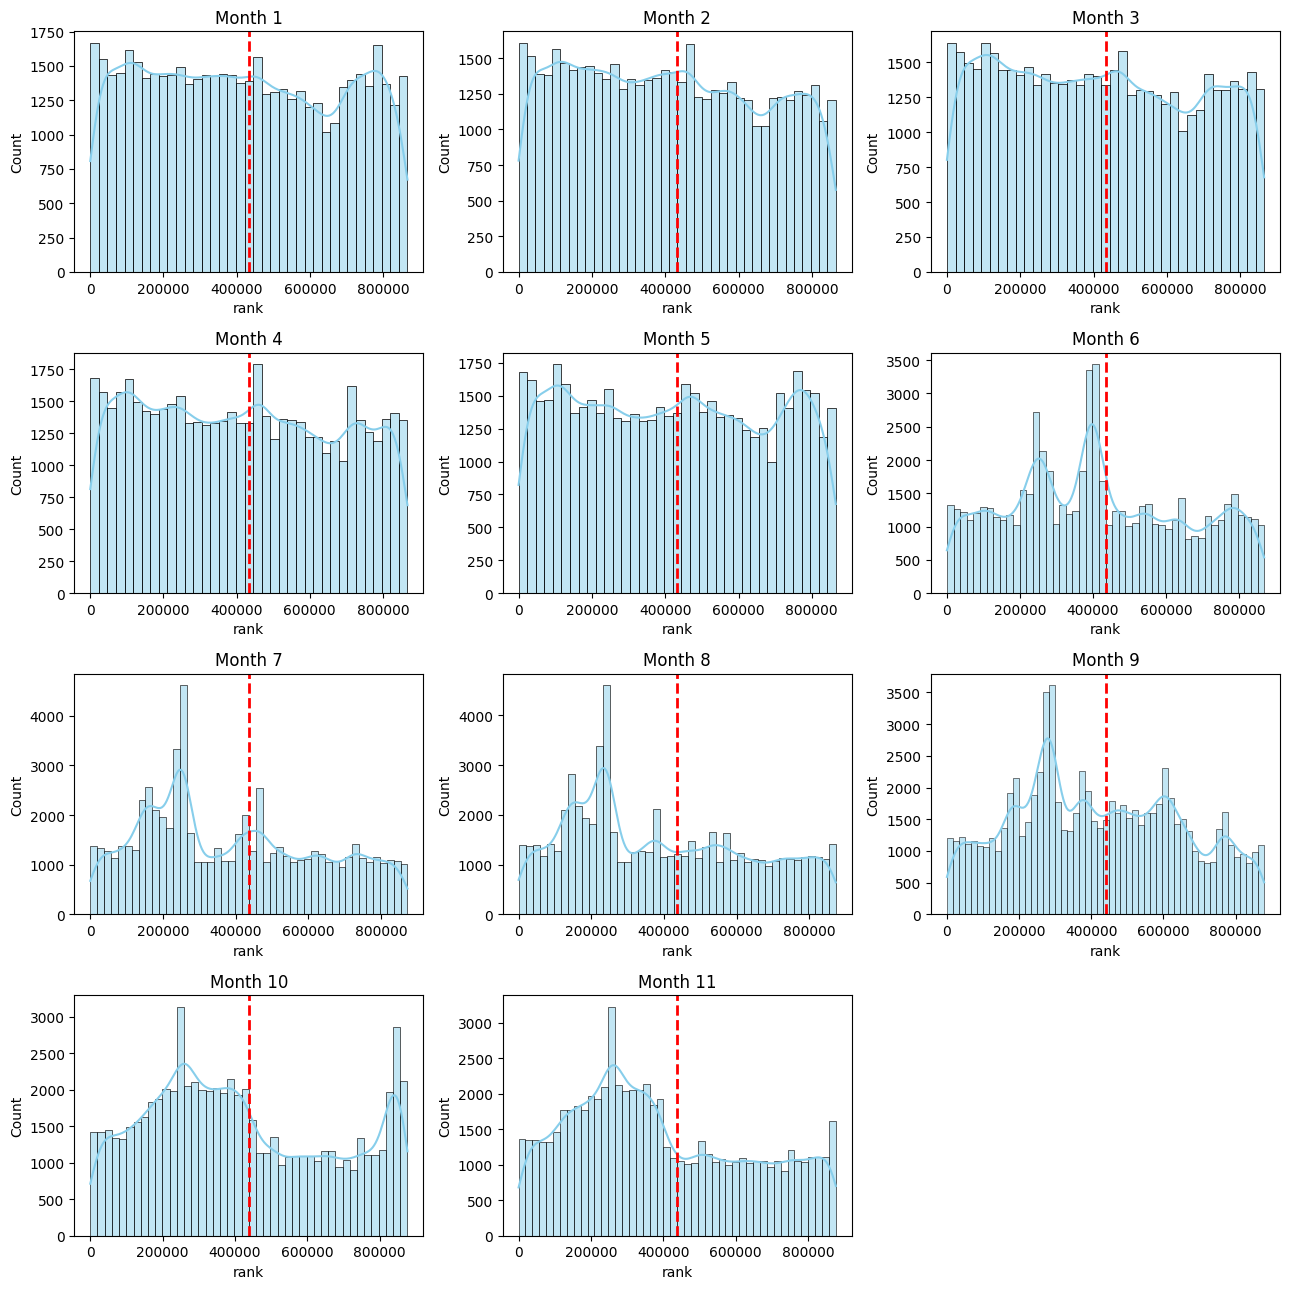

In [27]:
pred_25 = pd.read_parquet('./figure/test_results_with_preds_25.parquet')

cols = 3
rows = 4
fig, axes = plt.subplots(rows, cols, figsize=(13, 13))
axes = axes.flatten()

for i, f in enumerate(file):
    rank_25 = pd.read_parquet(f)
    merged_25 = pd.merge(rank_25, pred_25, on=['domain','label'])
    merged_25['rank'] = merged_25.index + 1

    median_val = merged_25['rank'].median()
    
    wrong_df = merged_25.query("label != pred")

    sns.histplot(data=wrong_df, x='rank', kde=True, ax=axes[i], color='skyblue')
    axes[i].axvline(median_val, color='red', linestyle='--', linewidth=2)
    axes[i].set_title(f"Month {i+1}") 
    axes[i].ticklabel_format(style='plain', axis='x')

if len(file) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


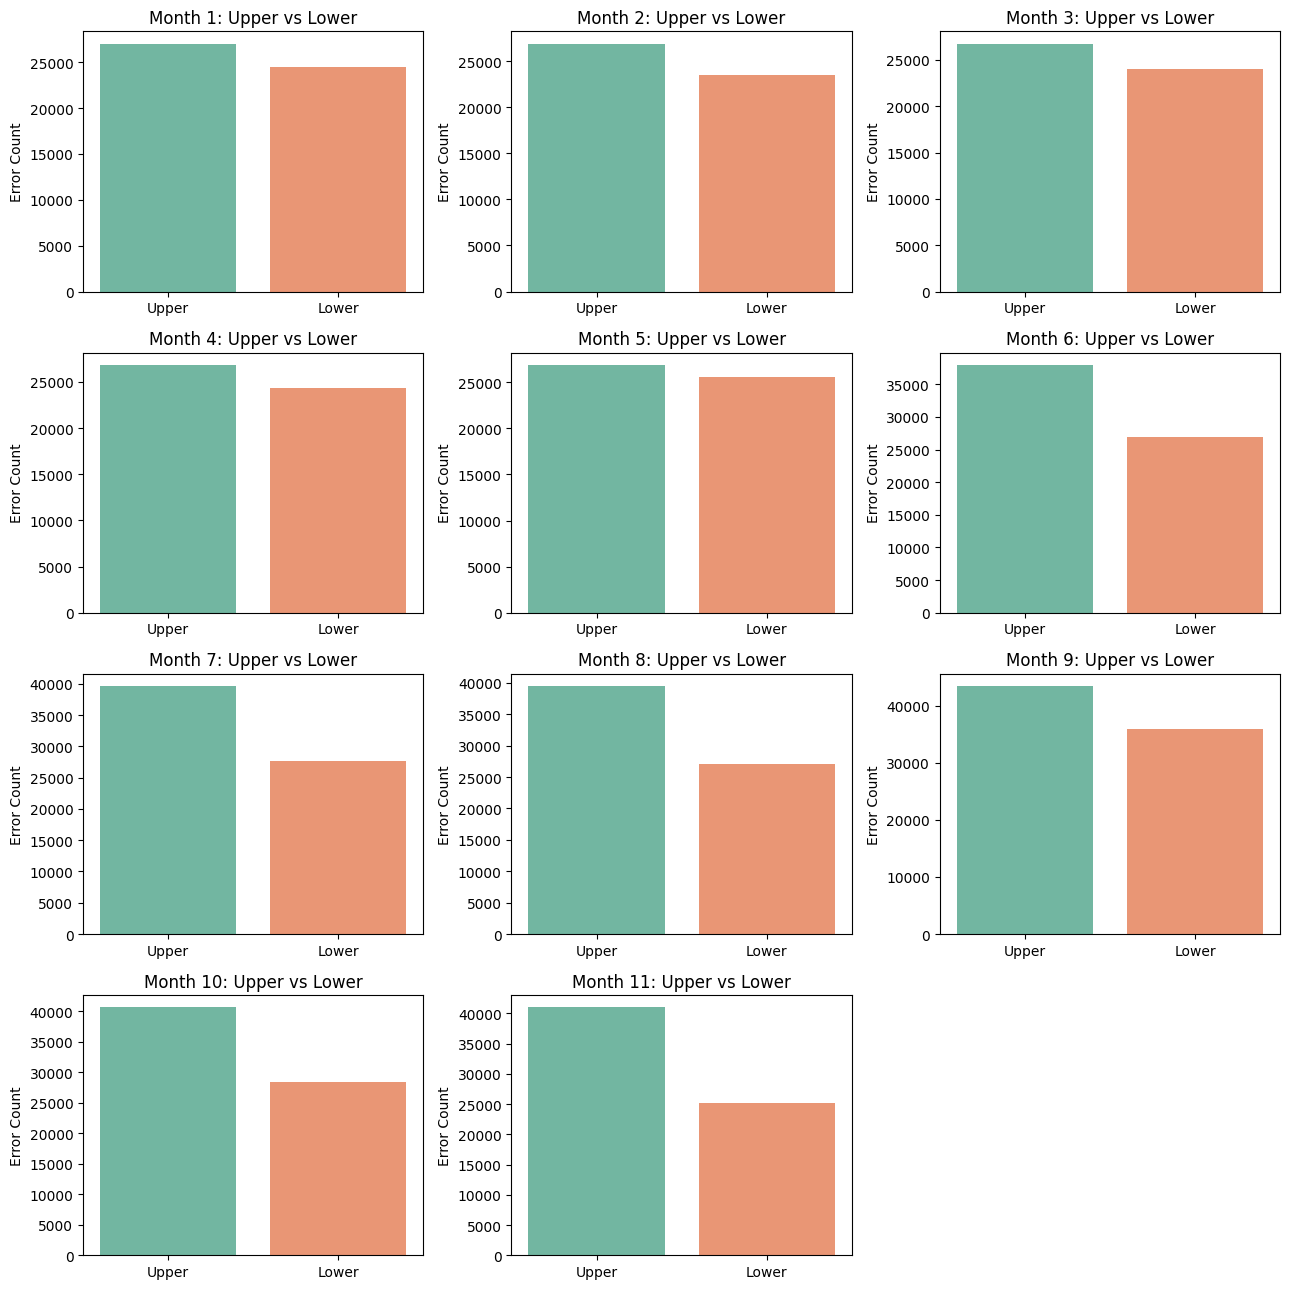

In [ ]:
cols = 3
rows = 4
fig, axes = plt.subplots(rows, cols, figsize=(13, 13))
axes = axes.flatten()

for i, f in enumerate(file):
    rank_25 = pd.read_parquet(f)
    merged_25 = pd.merge(rank_25, pred_25, on=['domain','label'])
    merged_25['rank'] = merged_25.index + 1
    
    median_val = merged_25['rank'].median()
    
    wrong_df = merged_25.query("label != pred").copy()
    
    wrong_df['rank_group'] = wrong_df['rank'].apply(lambda x: 'Upper' if x <= median_val else 'Lower')

    sns.countplot(data=wrong_df, x='rank_group', hue='rank_group', 
                  palette='Set2', ax=axes[i], order=['Upper', 'Lower'])
    
    axes[i].set_title(f"Month {i+1}: Upper vs Lower")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Error Count")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [13]:
rank_25 = pd.read_parquet('./figure/2025_merged.parquet')
rank_25_01 = pd.read_parquet('./figure/tranco_20250331.parquet')
rank_25_01 = rank_25_01.drop(columns=['TLD', 'SLD'])
pred_25 = pd.read_parquet('./figure/test_results_with_preds_25.parquet')

merged_25 = pd.merge(rank_25_01, pred_25, on=['domain','label'])
merged_25['rank'] = merged_25.index + 1
median_rank = merged_25['rank'].median()
merged_25 = merged_25.query("label != pred")
print(merged_25[140:180])

                  domain  label  pred  rank
1964                uiuc      0     1  1965
1990  dropboxusercontent      0     1  1991
2000              anoboy      0     1  2001
2012              krikya      0     1  2013
2016                gvt3      0     1  2017
2039              tiqcdn      0     1  2040
2044                  eu      0     1  2045
2050            kueezrtb      0     1  2051
2065              inkuai      0     1  2066
2092              lfstrm      0     1  2093
2108         oabaubsutha      0     1  2109
2111         webpkgcache      0     1  2112
2178           mupnungvl      0     1  2179
2209              bumlam      0     1  2210
2234              thawte      0     1  2235
2238            zijieapi      0     1  2239
2243                nejm      0     1  2244
2270          kbz0pwvxmv      0     1  2271
2285              egnyte      0     1  2286
2321            callrail      0     1  2322
2325               auth0      0     1  2326
2342              ixigua      0 

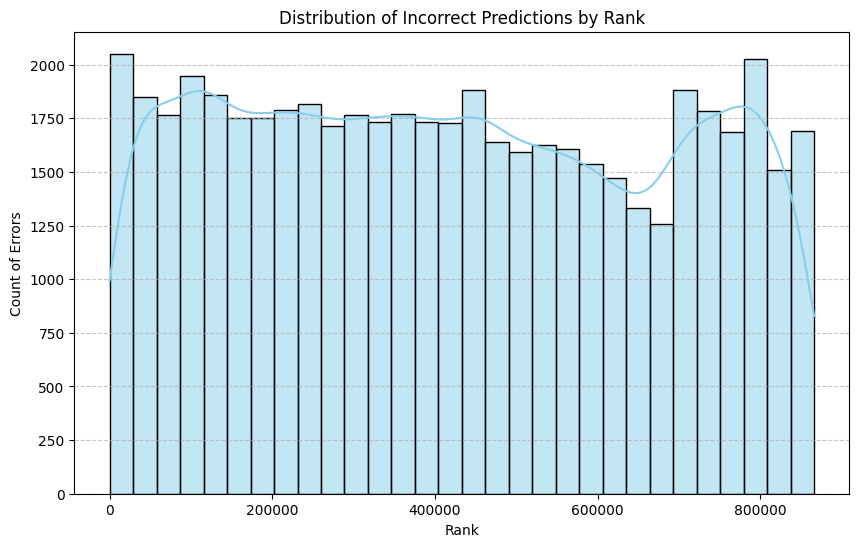

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_25, x='rank', kde=True, bins=30, color='skyblue')
# plt.ticklabel_format(style='plain', axis='x')

plt.title('Distribution of Incorrect Predictions by Rank')
plt.xlabel('Rank')
plt.ylabel('Count of Errors')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

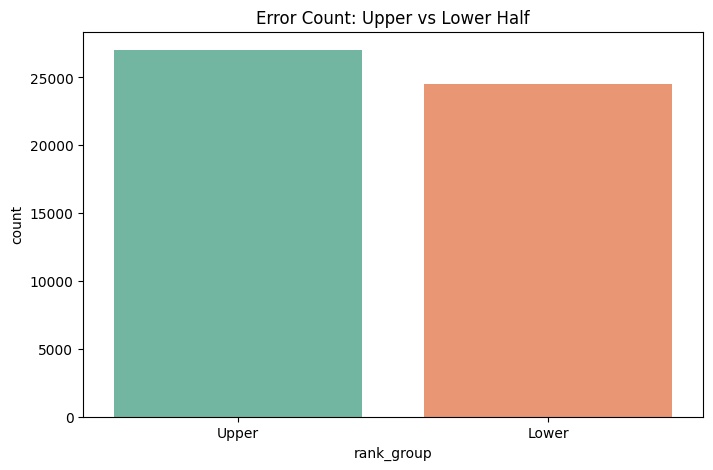

In [11]:
merged_25['rank_group'] = merged_25['rank'].apply(lambda x: 'Upper' if x <= median_rank else 'Lower')

plt.figure(figsize=(8, 5))
sns.countplot(data=merged_25, x='rank_group', hue='rank_group', palette='Set2')

plt.title('Error Count: Upper vs Lower Half')
plt.show()